In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
pd.api.types.is_categorical_dtype 

<function pandas.core.dtypes.common.is_categorical_dtype(arr_or_dtype) -> 'bool'>

In [ ]:
df = pd.read_csv('insurance_claim.csv', index_col = 0)
#df.head(10) 
#df.info() 
df.describe()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,11697.003207,1.482900,0.23920,1.056300
std,0.130752,2680.167384,2.241966,0.55499,1.652454
min,0.053358,2000.000000,0.000000,0.00000,0.000000
25%,0.431509,10000.000000,0.000000,0.00000,0.000000
50%,0.515813,11697.003207,0.000000,0.00000,0.000000
75%,0.607607,13000.000000,2.000000,0.00000,2.000000
max,0.960819,22000.000000,22.000000,6.00000,15.000000


In [ ]:
numerical_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 
                  'DUIS', 'PAST_ACCIDENTS']

categorical_cols = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                    'INCOME', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR','MARRIED',
                    'CHILDREN', 'LOCALITY', 'VEHICLE_TYPE']
#aqui, estou separando as variáveis numéricas das variáveis categóricas


def to_type(df, columns, type):
  for col in columns:
    df[col] = df[col].astype(type)
        

to_type(df, numerical_cols, 'float')
to_type(df, categorical_cols, 'category')


**Análise de features**

Nessa primeira parte, farei uma análise individual de algumas das variáveis categóricas, como idade, gênero, escolaridade e etc.

count     10000
unique        4
top       26-39
freq       3063
Name: AGE, dtype: object

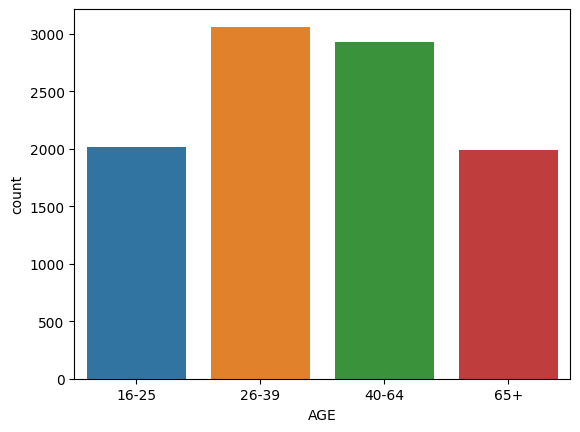

In [ ]:
sns.countplot(x = 'AGE', data= df)
df['AGE'].describe()

A distribuição de idades é liderada por adultos entre 26 e 39 anos, seguido de adultos entre 40 e 64 anos.

count        10000
unique           2
top       majority
freq          9012
Name: RACE, dtype: object

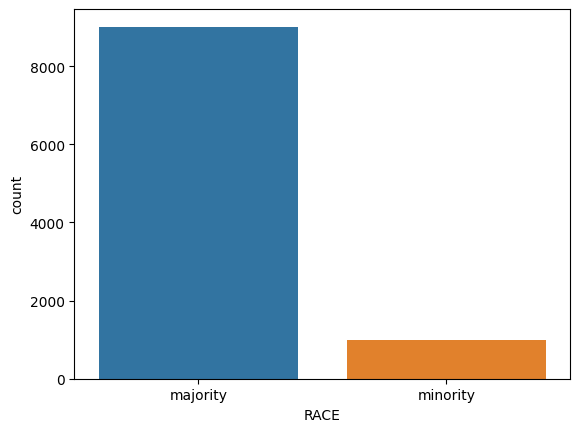

In [ ]:
sns.countplot(x = 'RACE', data= df)
df['RACE'].describe()

?

count      10000
unique         2
top       female
freq        5010
Name: GENDER, dtype: object

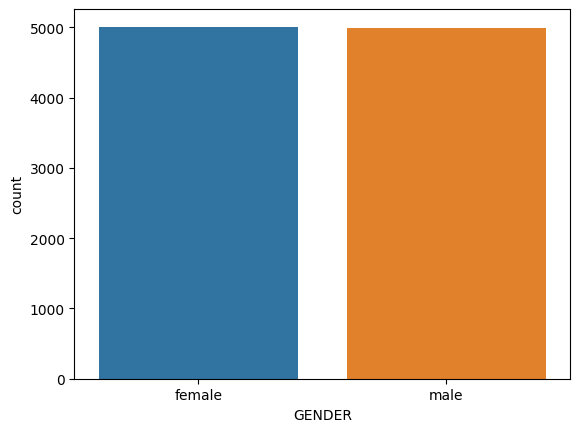

In [ ]:
sns.countplot(x = 'GENDER', data= df)
df['GENDER'].describe()

Nesse dataset, a quantidade de pessoas de gênero feminino e gênero masculino é praticamente a mesma, com uma diferença de 20 unidades para o feminino.

count     10000
unique        4
top        0-9y
freq       3530
Name: DRIVING_EXPERIENCE, dtype: object

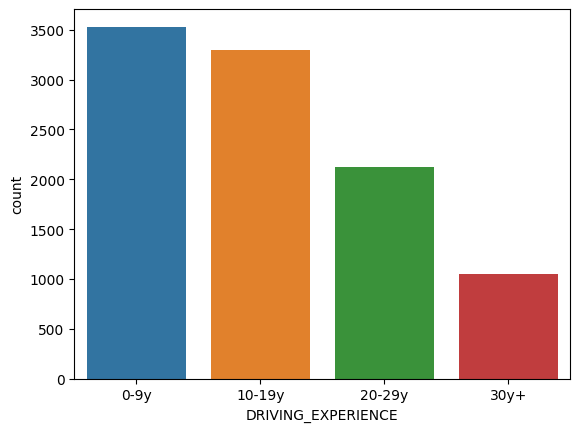

In [ ]:
sns.countplot(x = 'DRIVING_EXPERIENCE', data= df)
df['DRIVING_EXPERIENCE'].describe()

A maioria dos condutores tem de 0 e 9 anos de experiência, seguido dos que tem de 10 a 19. Enquanto os que tem mais de 20 estão em menor número.

count           10000
unique              3
top       high school
freq             4157
Name: EDUCATION, dtype: object

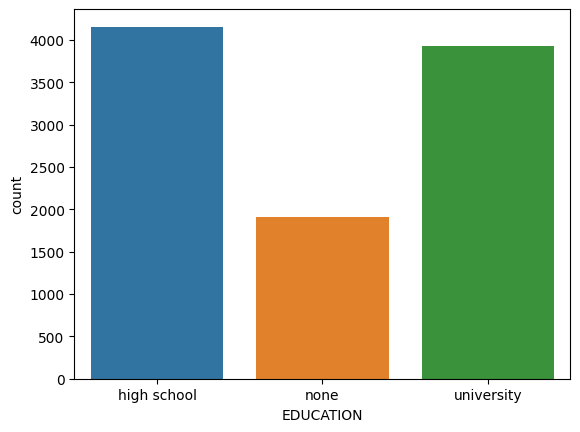

In [ ]:
sns.countplot(x = 'EDUCATION', data= df)
df['EDUCATION'].describe()

A maior parte das pessoas do dataset tem ensino médio completo (4157), seguido de ensino superior completo, e em menor parte, pessoas sem escolaridade.


count           10000
unique              4
top       upper class
freq             4336
Name: INCOME, dtype: object

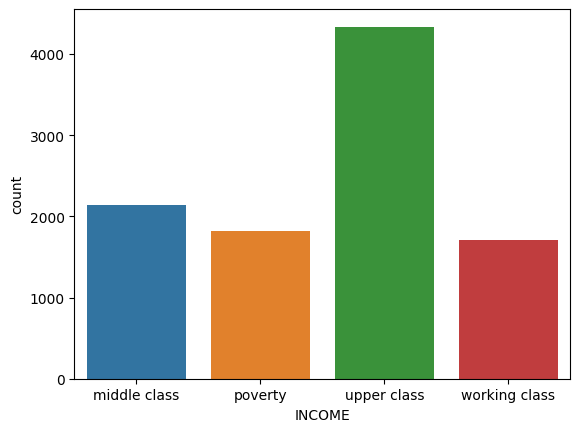

In [ ]:
sns.countplot(x = 'INCOME', data= df)
df['INCOME'].describe()

A maioria das pessoas do dataset são de classe alta.

count     10000
unique        2
top          no
freq       5018
Name: MARRIED, dtype: object

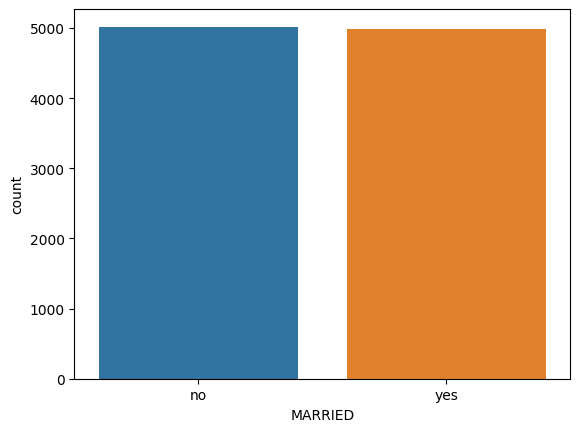

In [ ]:
sns.countplot(x = 'MARRIED', data= df)
df['MARRIED'].describe()

A quantidade de pessoas casadas ou não é praticamente a mesma.

count     10000
unique        2
top         yes
freq       6888
Name: CHILDREN, dtype: object

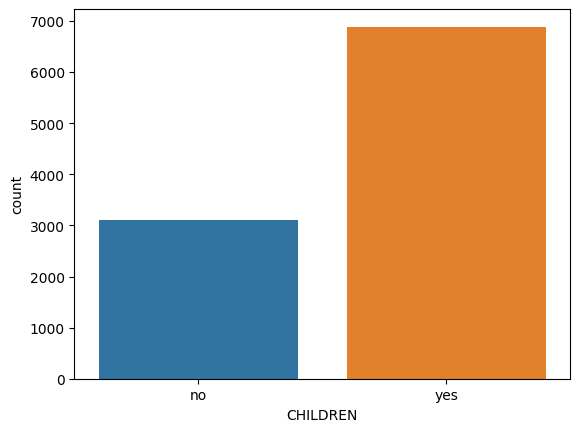

In [ ]:
sns.countplot(x = 'CHILDREN', data= df)
df['CHILDREN'].describe()

Cerca de 69% dessa população tem filhos.

Agora, plotarei alguns gráficos referentes as variáveis numéricas.

count    10000.000000
mean         0.515813
std          0.130752
min          0.053358
25%          0.431509
50%          0.515813
75%          0.607607
max          0.960819
Name: CREDIT_SCORE, dtype: float64

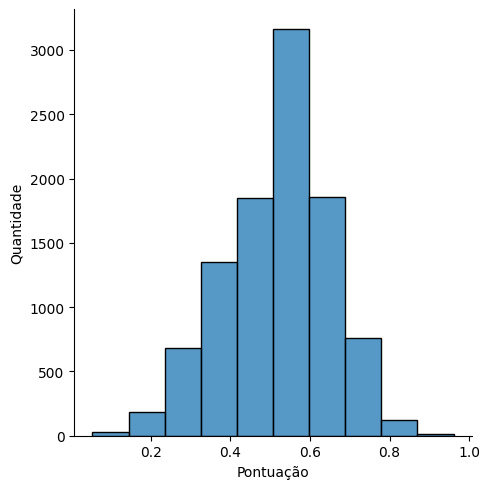

In [ ]:
sns.displot(df['CREDIT_SCORE'], bins=10)
plt.xlabel('Pontuação')
plt.ylabel('Quantidade')
df['CREDIT_SCORE'].describe()

A média dessa população possui uma pontuação de 0.51, ou seja, não são maus pagadores, mas também não são bons.

count    10000.000000
mean     11697.003207
std       2680.167384
min       2000.000000
25%      10000.000000
50%      11697.003207
75%      13000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

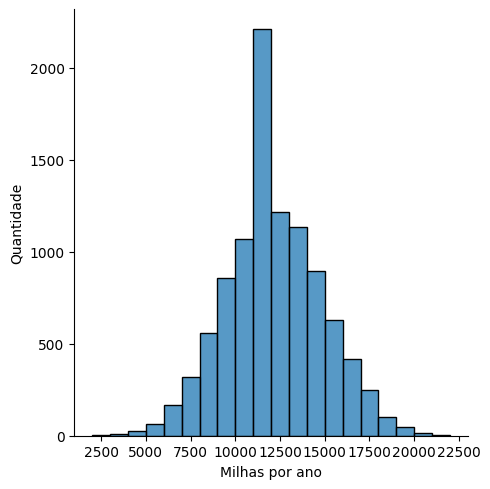

In [ ]:
sns.displot(df['ANNUAL_MILEAGE'], bins=20)
plt.xlabel('Milhas por ano')
plt.ylabel('Quantidade')
df['ANNUAL_MILEAGE'].describe()

Aparentemente, a maioria da população do dataset costuma andar até 15 mil milhas por ano, o que em KM seria 24,140 mil km, muito mais do que um brasileiro costuma fazer por ano em média (13 mil km). PS: adotei a medida de milhas por ser um dataset com dados de estadunidenses, então assumi que a quilometragem também estaria na respectiva unidade.

count    10000.000000
mean         1.482900
std          2.241966
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: SPEEDING_VIOLATIONS, dtype: float64

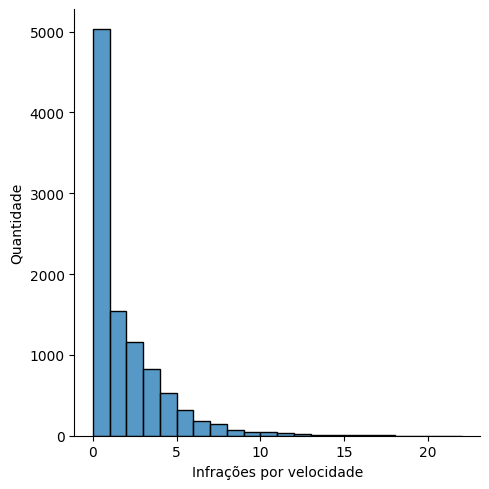

In [ ]:
sns.displot(df['SPEEDING_VIOLATIONS'], bins=22)
plt.xlabel('Infrações por velocidade')
plt.ylabel('Quantidade')
df['SPEEDING_VIOLATIONS'].describe()

Claramente existem poucas infrações por excesso de velocidade nessa população.

count    10000.00000
mean         0.23920
std          0.55499
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          6.00000
Name: DUIS, dtype: float64

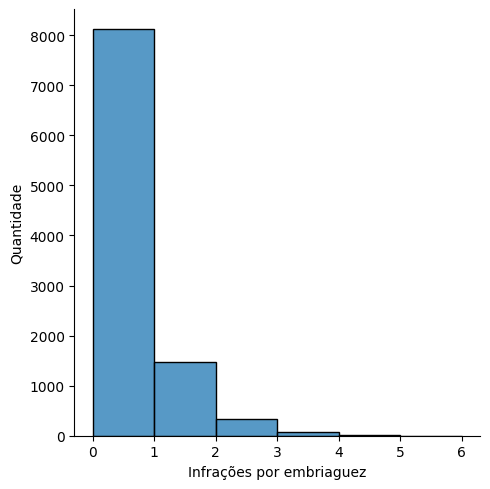

In [ ]:
sns.displot(df['DUIS'], bins=6)
plt.xlabel('Infrações por embriaguez')
plt.ylabel('Quantidade')
df['DUIS'].describe()

E também, poucas infrações por embriaguez ao volante.

count    10000.000000
mean         1.056300
std          1.652454
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         15.000000
Name: PAST_ACCIDENTS, dtype: float64

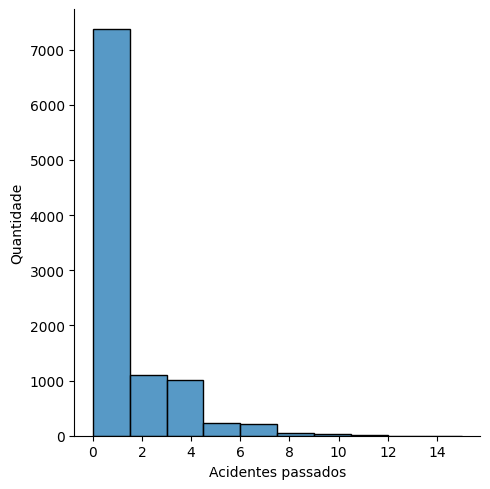

In [ ]:
sns.displot(df['PAST_ACCIDENTS'], bins=10)
plt.xlabel('Acidentes passados')
plt.ylabel('Quantidade')
df['PAST_ACCIDENTS'].describe()

Talvez como consequência, também existem poucos acidentes passados nessa população.

A partir de agora, passarei a relacionar os dados e tirar algumas conclusões a respeito.

"plt.ylabel = 'Experiência do condutor'\nplt.xlabel = 'Idade'\nplt.show() não funcionou :/"

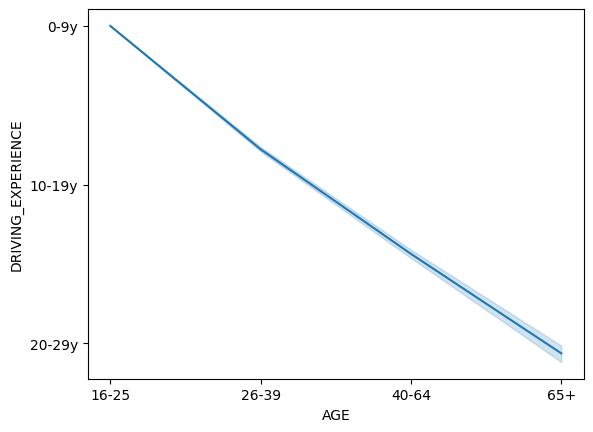

In [ ]:
sns.lineplot(data=df, x='AGE',y='DRIVING_EXPERIENCE')
'''plt.ylabel = 'Experiência do condutor'
plt.xlabel = 'Idade'
plt.show() não funcionou :/'''

Um resultado um tanto quanto óbvio, quanto mais velho o condutor, maior será sua experiência no volante. Talvez seja melhor relacionar dados mais interessantes...

<Axes: xlabel='GENDER', ylabel='SPEEDING_VIOLATIONS'>

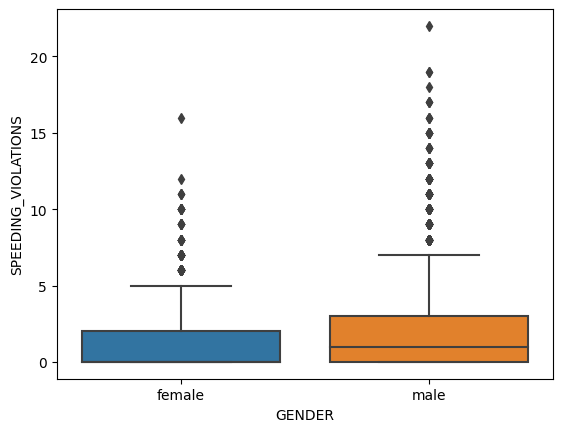

In [ ]:
sns.boxplot(x='GENDER', y = 'SPEEDING_VIOLATIONS' ,data=df)

Por aqui vemos que o número de infrações por excesso de velocidade é ligeiramente maior entre os homens do que em relação as mulheres.

<Axes: xlabel='LOCALITY', ylabel='SPEEDING_VIOLATIONS'>

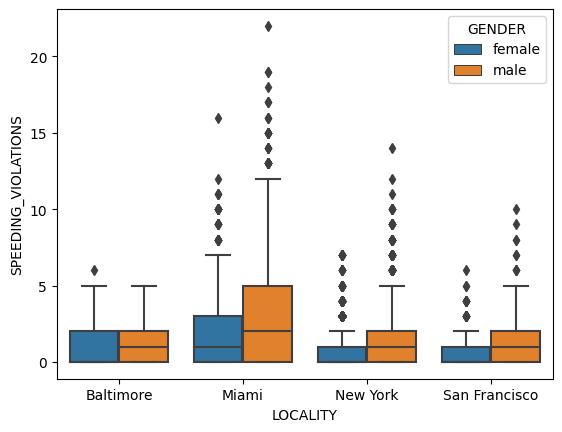

In [ ]:
sns.boxplot(x='LOCALITY', y = 'SPEEDING_VIOLATIONS' ,data=df, hue='GENDER')

Analisando mais a fundo, percebo que a cidade de Miami tem muito mais infrações que todas as outras.

<Axes: xlabel='PAST_ACCIDENTS', ylabel='SPEEDING_VIOLATIONS'>

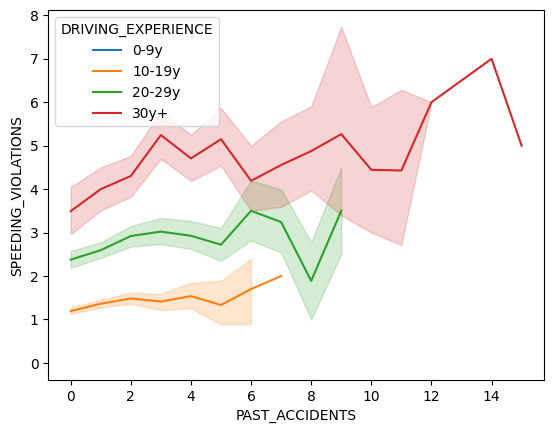

In [ ]:
sns.lineplot(x='PAST_ACCIDENTS', y = 'SPEEDING_VIOLATIONS' ,data=df, hue = 'DRIVING_EXPERIENCE')

A grande maioria dos condutores que sofreram vários acidentes e tem muitas infrações por alta velocidade tem mais de 30 anos de experiência, enquanto os condutores menos experientes tem menos infrações e menos acidentes, nem chegam a aparecer no gráfico.

<Axes: xlabel='PAST_ACCIDENTS', ylabel='SPEEDING_VIOLATIONS'>

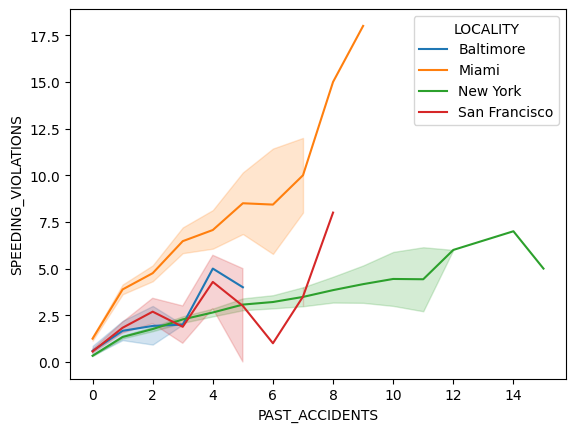

In [ ]:
sns.lineplot(x='PAST_ACCIDENTS', y = 'SPEEDING_VIOLATIONS' ,data=df, hue = 'LOCALITY')

Mais uma observação: Enquanto a cidade de NY tem mais acidentes, Miamy city tem mais infrações por alta velocidade.

<Axes: xlabel='PAST_ACCIDENTS', ylabel='SPEEDING_VIOLATIONS'>

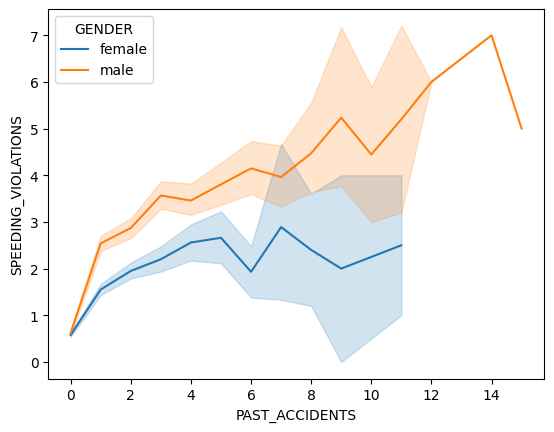

In [ ]:
sns.lineplot(x='PAST_ACCIDENTS', y = 'SPEEDING_VIOLATIONS' ,data=df, hue = 'GENDER')

E por fim, tanto os acidentes quanto as infrações por alta velocidade são causadas majoritariamente por homens.

E a relação entre infrações por embriaguez e por velocidade?

<Axes: xlabel='DUIS', ylabel='SPEEDING_VIOLATIONS'>

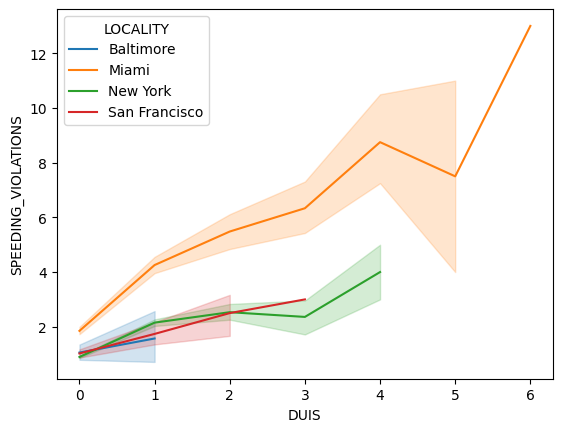

In [ ]:
sns.lineplot(x='DUIS', y = 'SPEEDING_VIOLATIONS' ,data=df, hue = 'LOCALITY')

Novamente, Miami aparece, dessa vez sendo a que mais relaciona positivamente as duas infrações.

<Axes: >

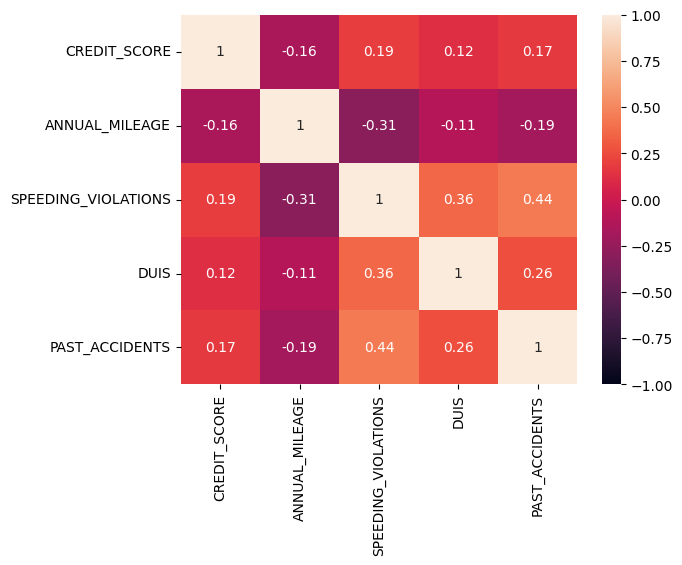

In [ ]:
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

Olhando esse heatmap, confirmamos que os acidentes passados e as infrações por alta velocidade estão positivamente relacionados(0.44). Outra característica interessante é a relação positiva entre as infrações de velocidade e de embriaguez (0.36). E por fim, curiosamente, a quilometragem anual rodada e as infrações por excesso de velocidade também estão relacionadas, mas negativamente (-0.31).

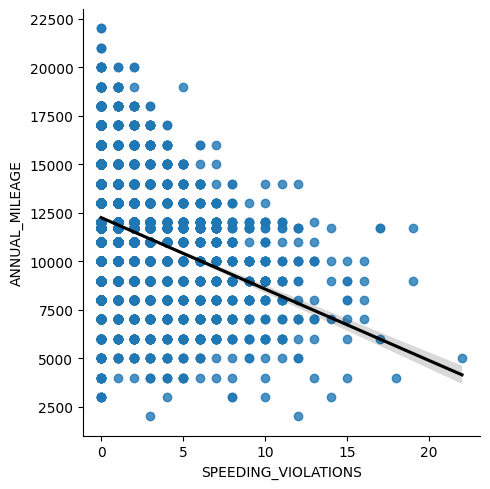

In [ ]:
sns.lmplot(x='SPEEDING_VIOLATIONS',y='ANNUAL_MILEAGE',data=df,
           line_kws={'color':'black'})

E por incrível que pareça, os motoristas que fazem menos quilometragem anual são o que tem maior taxa de infração por altas velocidades.

<Axes: xlabel='SPEEDING_VIOLATIONS', ylabel='ANNUAL_MILEAGE'>

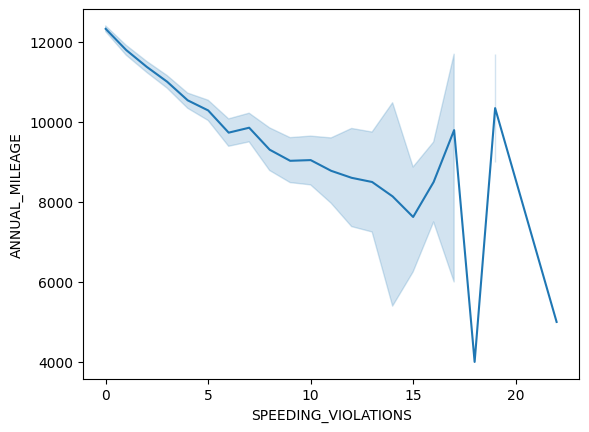

In [ ]:
sns.lineplot(x='SPEEDING_VIOLATIONS',y='ANNUAL_MILEAGE',data=df)

Gráfico que apresenta melhor essa informação.

**Análise de outcome**

idade do motorista x tempo de experiência na aprovação do sinistro

In [39]:
sns.stripplot(x='AGE', y = 'DRIVING_EXPERIENCE', data=df)
sns.stripplot(x='AGE', y = 'DRIVING_EXPERIENCE', data=df, hue = 'OUTCOME')
sns.swarmplot(x='AGE', y = 'DRIVING_EXPERIENCE', data=df)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8f845ab940> (for post_execute):


KeyboardInterrupt: ignored